## Задание 3. Python
### 3.1 Задача

######  Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [1]:
import pandas as pd

In [2]:
def func_concat(path_1, path_2, path_3, path_4):
    
    df_1 = pd.read_csv(path_1, sep=';', header = 0, names = ['student_id','groups']) # загружаем файл с информацией о 
    # принадлежности пользователя к контрольной или эксперементальной группе
    
    try:
        df_2 = pd.read_csv(path_2,sep=',', header = 0, names = ['student_id','groups'])
    except:
        df_2 = pd.read_csv(path_2,sep=';', header = 0, names = ['student_id','groups']) # загружаем дополнительный файл с 
     # информацией о принадлежности пользователя к группе. Делаем подстраховку на считывание разделителя.  
        
    all_users_groups = pd.concat([df_1, df_2]).drop_duplicates() # соединяем файлы
    all_users_groups.to_csv('all_users_groups.to_csv', sep = ';')
    
    active_students = pd.read_csv(path_3, sep=';', header = 0, names = ['student_id']) # загружаем информацию об активных студентах
    active_students = active_students.merge(all_users_groups, on='student_id', how='left').drop_duplicates() #к данным об
    # активности студентов добавили данные о группах
   
    count_active = active_students.groupby('groups', as_index = False)\
    .agg({'student_id':'count'})\
    .rename(columns=({'student_id': 'active_users'}))  # посчитали количество активных пользователей
    
    checks = pd.read_csv(path_4,sep=';', header = 0, names = ['student_id','revenue']) # загружаем данные о покупках
    all_users_groups = all_users_groups.merge(checks, on = 'student_id', how='left').fillna(0) # соединяем данные о покупках
    # с данными о группах пользователей
    
    metrics = all_users_groups.groupby('groups', as_index=False)\
    .agg({'student_id':'nunique'})\
    .rename(columns={'student_id':'all_users'}) # посчитали, сколько пользователей в каждой группе
    
    revenue = all_users_groups.query('revenue>0')\
    .groupby('groups', as_index = False)\
    .agg({'revenue':'sum', 'student_id':'nunique'})\
    .rename(columns={'student_id':'paying_users'})\
    .round() # посчитали доход и количество платящих пользователей в каждой группе
    
    metrics = metrics.merge(count_active, on = 'groups')\
        .merge(revenue, on = 'groups') # собрали данные в одну таблицу
    
    # считаем метрики:
    
    metrics['arpu'] = round((metrics.revenue/metrics.all_users),2) # посчитали arpu
    metrics['arppu'] = round((metrics.revenue/metrics.paying_users),2) # посчитали arppu
    metrics['cr'] = round((metrics.paying_users/metrics.all_users *100),2) # посчитала конверсию (в %) в покупку из всех пользователей
    metrics['cr_active'] = round((metrics.paying_users/metrics.active_users *100),2) # посчитала конверсию (в %) из активных пользователей
    
    return metrics
    
    

In [3]:
df = func_concat('Проект_2_groups.csv', 'Проект_2_group_add.csv', 'Проект_2_active_studs.csv', 'Проект_2_checks.csv')

In [4]:
df

,groups,all_users,active_users,revenue,paying_users,arpu,arppu,cr,cr_active
0,A,14693,1538,92096.0,107,6.27,860.71,0.73,6.96
1,B,59883,6803,481230.0,434,8.04,1108.82,0.72,6.38


#### 3.2 Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
def grafics(path_1, path_2, path_3, path_4):
    
    df_1 = pd.read_csv(path_1, sep=';', header = 0, names = ['student_id','groups']) # загружаем файл с информацией о 
    # принадлежности пользователя к контрольной или эксперементальной группе
    
    try:
        df_2 = pd.read_csv(path_2,sep=',', header = 0, names = ['student_id','groups'])
    except:
        df_2 = pd.read_csv(path_2,sep=';', header = 0, names = ['student_id','groups']) # загружаем дополнительный файл с 
     # информацией о принадлежности пользователя к группе. Делаем подстраховку на считывание разделителя.  
        
    all_users_groups = pd.concat([df_1, df_2]).drop_duplicates() # соединяем файлы
    all_users_groups.to_csv('all_users_groups.csv', sep = ';')
    
    active_students = pd.read_csv(path_3, sep=';', header = 0, names = ['student_id']) # загружаем информацию об активных студентах
    active_students = active_students.merge(all_users_groups, on='student_id', how='left').drop_duplicates() #к данным об
    # активности студентов добавили данные о группах
   
    count_active = active_students.groupby('groups', as_index = False)\
    .agg({'student_id':'count'})\
    .rename(columns=({'student_id': 'active_users'}))  # посчитали количество активных пользователей
    
    checks = pd.read_csv(path_4,sep=';', header = 0, names = ['student_id','revenue']) # загружаем данные о покупках
    all_users_groups = all_users_groups.merge(checks, on = 'student_id', how='left').fillna(0) # соединяем данные о покупках
    # с данными о группах пользователей
    
    metrics = all_users_groups.groupby('groups', as_index=False)\
    .agg({'student_id':'nunique'})\
    .rename(columns={'student_id':'all_users'}) # посчитали, сколько пользователей в каждой группе
    
    revenue = all_users_groups.query('revenue>0')\
    .groupby('groups', as_index = False)\
    .agg({'revenue':'sum', 'student_id':'nunique'})\
    .rename(columns={'student_id':'paying_users'})\
    .round() # посчитали доход и количество платящих пользователей в каждой группе
    
    metrics = metrics.merge(count_active, on = 'groups')\
        .merge(revenue, on = 'groups') # собрали данные в одну таблицу
    
    # считаем метрики:
    
    metrics['arpu'] = round((metrics.revenue/metrics.all_users),2) # посчитали arpu
    metrics['arppu'] = round((metrics.revenue/metrics.paying_users),2) # посчитали arppu
    metrics['cr'] = round((metrics.paying_users/metrics.all_users *100),2) # посчитала конверсию (в %) в покупку из всех пользователей
    metrics['cr_active'] = round((metrics.paying_users/metrics.active_users *100),2) # посчитала конверсию (в %) из активных пользователей
    
    sns.set_theme()
    sns.set_context("talk")
    sns.set_style("whitegrid")
    #sns.despine()
    sns.set (rc={"figure.figsize":( 18 , 12 )})# размеры графика
    sns.set (font_scale= 3 ) # размер шрифтов
    sns.set_context("talk") #размер фигур


    #define plotting region (2 row, 2 columns)
    fig, axes = plt.subplots(2, 2)
    fig.tight_layout(h_pad= 6) # увеличиваем отступ между подграфиками
    fig.suptitle('METRICS') # заголовок
    plt.subplots_adjust(top= 0.85) # увеличиваем отступ между заголовком и графиками
   

    sns.barplot(data=df, x='groups', y='cr', ax=axes[0,0]).set(title= 'CR')
    sns.barplot(data=df, x='groups', y='cr_active', ax=axes[0,1]).set(title= 'CR_ACTIVE')
    sns.barplot(data=df, x='groups', y='arpu', ax=axes[1,0]).set(title= 'ARPU')
    sns.barplot(data=df, x='groups', y='arppu', ax=axes[1,1]).set(title= 'ARPPU')
    
    plt.show()
    

    return fig, axes
    

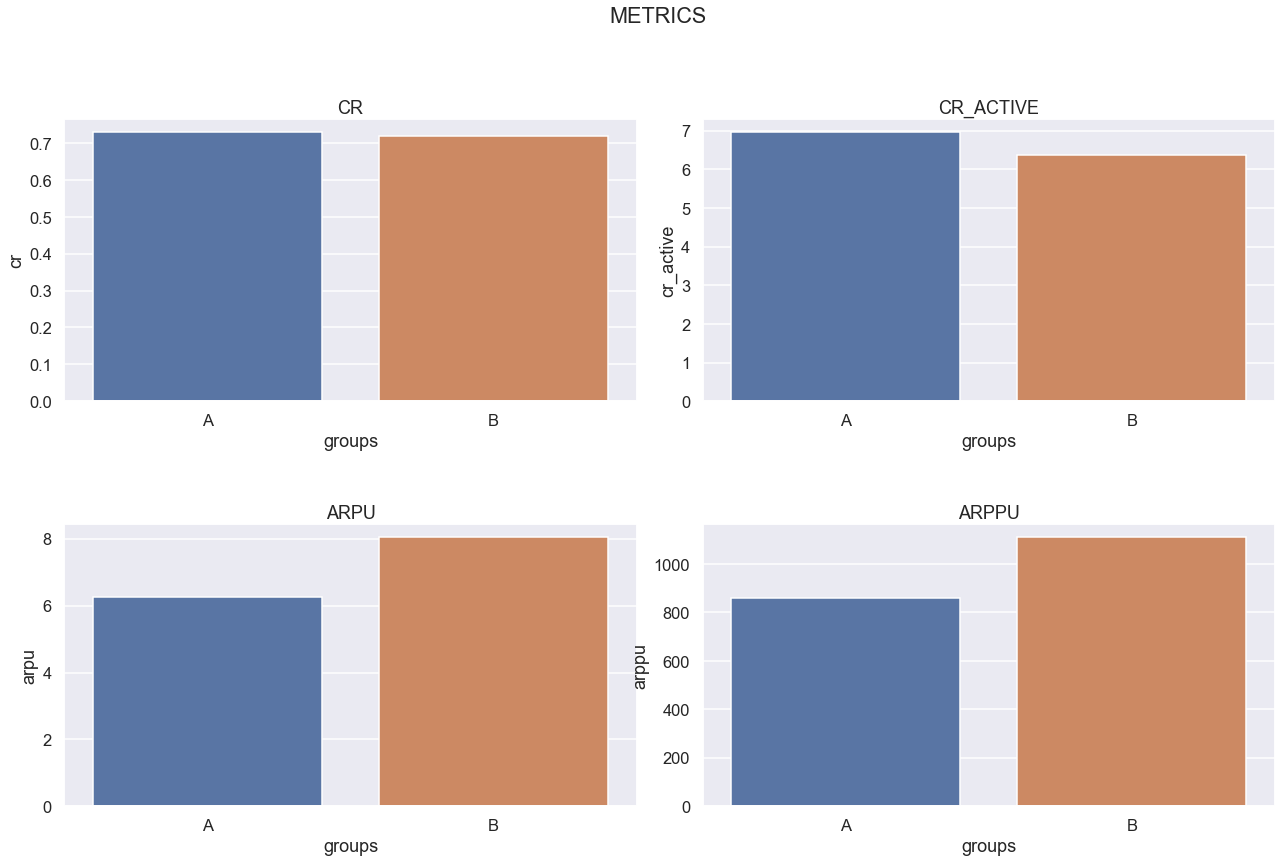

(<Figure size 1296x864 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'CR'}, xlabel='groups', ylabel='cr'>,
         <AxesSubplot:title={'center':'CR_ACTIVE'}, xlabel='groups', ylabel='cr_active'>],
        [<AxesSubplot:title={'center':'ARPU'}, xlabel='groups', ylabel='arpu'>,
         <AxesSubplot:title={'center':'ARPPU'}, xlabel='groups', ylabel='arppu'>]],
       dtype=object))

In [63]:
grafics('Проект_2_groups.csv', 'Проект_2_group_add.csv', 'Проект_2_active_studs.csv', 'Проект_2_checks.csv')